In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
import pandas as pd
import re
import array as arr
from scipy.stats import pearsonr

In [3]:
df=pd.read_csv("base_mod_with_metrics.csv")

    ba-m  simple-spread-chance  threshold
0      1                  0.01          0
1      1                  0.05         35
2      1                  0.10         62
3      1                  0.25         31
4      1                  0.50         30
5      1                  0.75         89
6      2                  0.01          0
7      2                  0.05        149
8      2                  0.10        150
9      2                  0.25        150
10     2                  0.50        150
11     2                  0.75        150
12     3                  0.01          0
13     3                  0.05        150
14     3                  0.10        150
15     3                  0.25        150
16     3                  0.50        150
17     3                  0.75        150
18     5                  0.01          0
19     5                  0.05        150
20     5                  0.10        150
21     5                  0.25        150
22     5                  0.50    

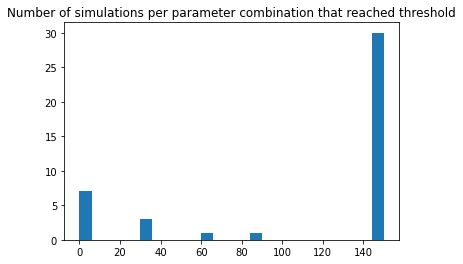

In [4]:
base_mod_thresh_count=df.groupby(["ba-m", 'simple-spread-chance'])['threshold'].sum().reset_index()
print(base_mod_thresh_count)

plt.hist(base_mod_thresh_count["threshold"], bins=25)
plt.title('Number of simulations per parameter combination that reached threshold')
plt.show()




In [5]:
base_mod_thresh_count=base_mod_thresh_count.loc[base_mod_thresh_count['threshold']>=105]
print(base_mod_thresh_count)


    ba-m  simple-spread-chance  threshold
7      2                  0.05        149
8      2                  0.10        150
9      2                  0.25        150
10     2                  0.50        150
11     2                  0.75        150
13     3                  0.05        150
14     3                  0.10        150
15     3                  0.25        150
16     3                  0.50        150
17     3                  0.75        150
19     5                  0.05        150
20     5                  0.10        150
21     5                  0.25        150
22     5                  0.50        150
23     5                  0.75        150
25    10                  0.05        150
26    10                  0.10        150
27    10                  0.25        150
28    10                  0.50        150
29    10                  0.75        150
31    20                  0.05        150
32    20                  0.10        150
33    20                  0.25    

In [6]:
#now lets limit the spread to runs where 80% of the scenarios passed the chosen threshold
#add success/not success column

df['param-thresh']=None
for i in range(0, len(base_mod_thresh_count)):
    ba_m_val = base_mod_thresh_count['ba-m'].iloc[i]
    simple_spread_chance_val = base_mod_thresh_count['simple-spread-chance'].iloc[i]
    print('next param setting',i)
    for j in range(0, len(df)):
        if df['ba-m'].iloc[j] == ba_m_val:
            if df['simple-spread-chance'].iloc[j] == simple_spread_chance_val:
                df['param-thresh'].iloc[j] = 1       
            else:
                pass
        else:
            pass

df.to_csv('base_mod_with_param_thresh.csv')            
print(df)

next param setting 0


C:\Users\cknox\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


next param setting 1
next param setting 2
next param setting 3
next param setting 4
next param setting 5
next param setting 6
next param setting 7
next param setting 8
next param setting 9
next param setting 10
next param setting 11
next param setting 12
next param setting 13
next param setting 14
next param setting 15
next param setting 16
next param setting 17
next param setting 18
next param setting 19
next param setting 20
next param setting 21
next param setting 22
next param setting 23
next param setting 24
next param setting 25
next param setting 26
next param setting 27
next param setting 28
next param setting 29
      Unnamed: 0   run    n spread-type  simple-spread-chance  \
0              0     0  300      simple                  0.01   
1              1     1  300      simple                  0.01   
2              2     2  300      simple                  0.01   
3              3     3  300      simple                  0.01   
4              4     4  300      simple       

In [7]:
base_mod_thresh_pass=df.loc[df['param-thresh'] == 1]
print(base_mod_thresh_pass)

      Unnamed: 0   run    n spread-type  simple-spread-chance  \
1200        1200  1200  300      simple                  0.05   
1201        1201  1201  300      simple                  0.05   
1202        1202  1202  300      simple                  0.05   
1203        1203  1203  300      simple                  0.05   
1204        1204  1204  300      simple                  0.05   
...          ...   ...  ...         ...                   ...   
6292        6292  6292  300      simple                  0.75   
6293        6293  6293  300      simple                  0.75   
6294        6294  6294  300      simple                  0.75   
6295        6295  6295  300      simple                  0.75   
6296        6296  6296  300      simple                  0.75   

           graph-type  ba-m  citizen-citizen-influence  \
1200  barabasi-albert     2                          1   
1201  barabasi-albert     2                          1   
1202  barabasi-albert     2                  

In [11]:
#I want to make this nice figure agin too 
df=pd.read_csv("infl_mod_with_param_thresh.csv")
print(df)

       Unnamed: 0  Unnamed: 0.1    run    n spread-type  simple-spread-chance  \
0               0             0      0  300      simple                  0.01   
1               1             1      1  300      simple                  0.01   
2               2             2      2  300      simple                  0.01   
3               3             3      3  300      simple                  0.01   
4               4             4      4  300      simple                  0.01   
...           ...           ...    ...  ...         ...                   ...   
64637       64637         64637  64637  300      simple                  0.75   
64638       64638         64638  64638  300      simple                  0.75   
64639       64639         64639  64639  300      simple                  0.75   
64640       64640         64640  64640  300      simple                  0.75   
64641       64641         64641  64641  300      simple                  0.75   

            graph-type  ba-

In [12]:
df=df.loc[df["param-thresh"]==1]
print(df)

       Unnamed: 0  Unnamed: 0.1    run    n spread-type  simple-spread-chance  \
14060       14060         14060  14060  300      simple                  0.05   
14061       14061         14061  14061  300      simple                  0.05   
14062       14062         14062  14062  300      simple                  0.05   
14063       14063         14063  14063  300      simple                  0.05   
14064       14064         14064  14064  300      simple                  0.05   
...           ...           ...    ...  ...         ...                   ...   
64637       64637         64637  64637  300      simple                  0.75   
64638       64638         64638  64638  300      simple                  0.75   
64639       64639         64639  64639  300      simple                  0.75   
64640       64640         64640  64640  300      simple                  0.75   
64641       64641         64641  64641  300      simple                  0.75   

            graph-type  ba-

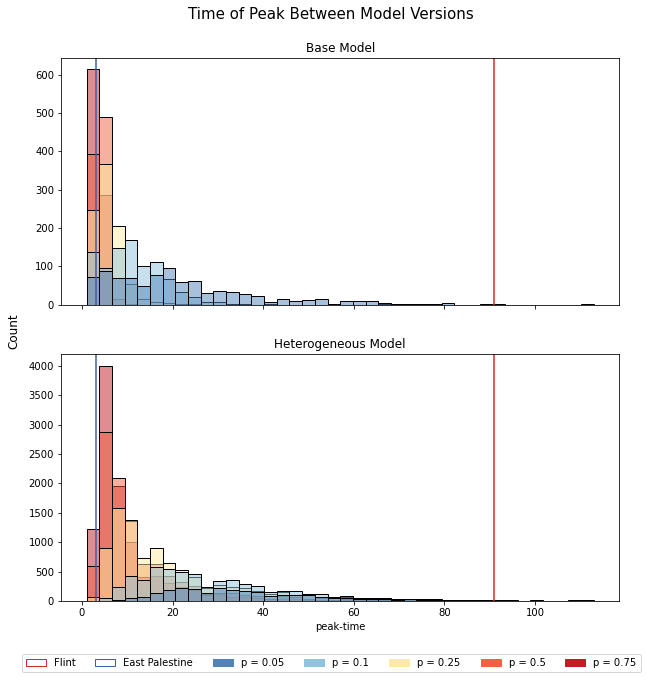

In [15]:
# can we do these in one figure
fig, axes=plt.subplots(2,1, sharex=True, sharey=False,figsize= (10,10))
fig.suptitle('Time of Peak Between Model Versions', fontsize=15,x=.5,y=.95)
#fig.text(.5, 0.09, "Time of Peak in Simulation", ha="center", fontsize = 12)
fig.text(0.05, .5, "Count", va="center", rotation = "vertical", fontsize = 12)

#ax[0].hist(x=base_mod_thresh_pass["peak-time"], )

#sns.regplot(x='value', y='wage', data=df_melt, ax=axs[0])
#sns.regplot(x='value', y='wage', data=df_melt, ax=axs[1])
#sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])



sns.histplot(base_mod_thresh_pass, x="peak-time", hue="simple-spread-chance", bins=40, palette=['#5183bb','#90c3dd','#feeba1','#ef633f','#c21c27'], legend = False, ax=axes[0])
axes[0].axvline(91,0,800, color = '#d22b27', label = "Flint Peak")
axes[0].axvline(3,0,800, color = '#3e5ea8', label = "East Palestine")
axes[0].set_title("Base Model")
axes[0].set_ylabel(" ")
#plt.xlabel("Time of Peak")

sns.histplot(df, x="peak-time", hue="simple-spread-chance", bins=40, palette=['#5183bb','#90c3dd','#feeba1','#ef633f','#c21c27'], legend = False, ax=axes[1])
axes[1].axvline(91,0,800, color = '#d22b27', label = "Flint Peak")
axes[1].axvline(3,0,800, color = '#3e5ea8', label = "East Palestine")
axes[1].set_title("Heterogeneous Model")
axes[1].set_ylabel(" ")


flint = mpatches.Patch(color='#d22b27', label='Flint', fill=False)
ep = mpatches.Patch(color='#3e5ea8', label='East Palestine', fill=False)
sim1 = mpatches.Patch(color='#5183bb', label='p = 0.05')
sim2 = mpatches.Patch(color='#90c3dd', label='p = 0.1')
sim3 = mpatches.Patch(color='#feeba1', label='p = 0.25')
sim4 = mpatches.Patch(color='#ef633f', label='p = 0.5')
sim5 = mpatches.Patch(color='#c21c27', label='p = 0.75')
fig.legend(handles=[flint, ep, sim1,sim2,sim3,sim4,sim5], loc = 'lower center', bbox_to_anchor=(0.5,0.02), ncol=7, fontsize=10, )

plt.savefig("Time of Peak histogrames 7_19.png")